In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

# estbalish csv path
survey_data_path = '../resources/survey-data.csv'

# read csv in as a pandas data frame
survey_data_df = pd.read_csv(survey_data_path)

# check if csv was read in correctly
survey_data_df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,NaN,No,Yes,Often,25-Feb,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,NaN,No,No,Rarely,25-Feb,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


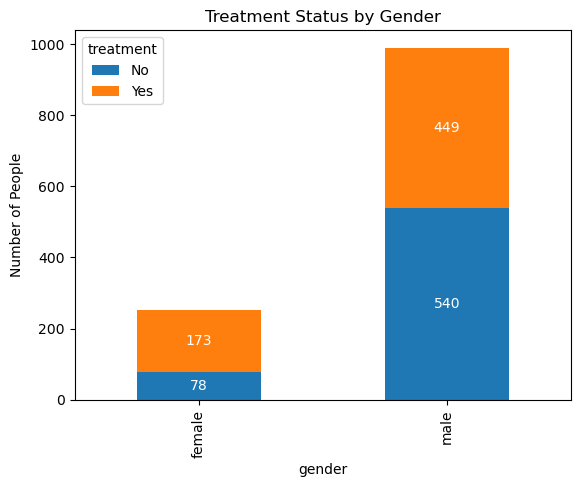

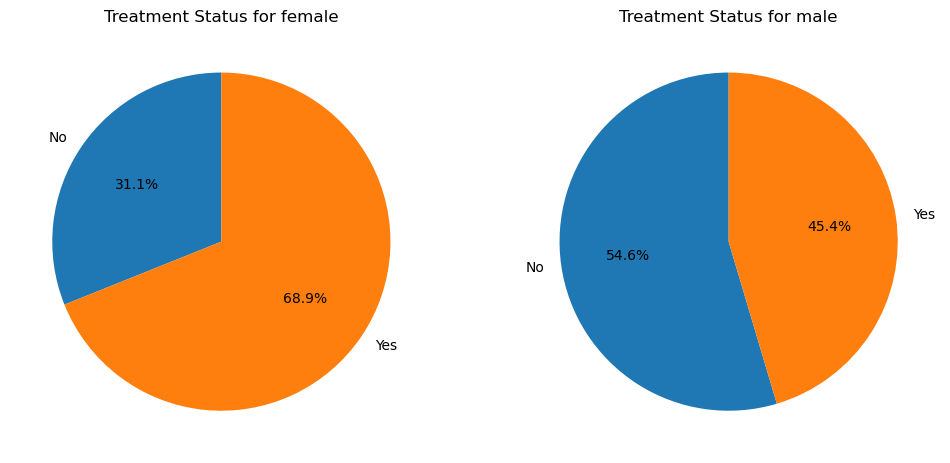

Chi-square value: 43.38082643958715
P-value: 4.5058162382400003e-11


In [4]:
# groupby 'gender' and 'treatment', and count occurrences
gender_treatment_counts = survey_data_df.groupby(['gender', 'treatment']).size().unstack().fillna(0)

# plot bar chart
ax = gender_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Gender')

# add annotations to bars within the bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

# plot pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, gender in enumerate(gender_treatment_counts.index):
    gender_data = gender_treatment_counts.loc[gender]
    axes[i].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Treatment Status for {gender}')

# show charts
plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['gender'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

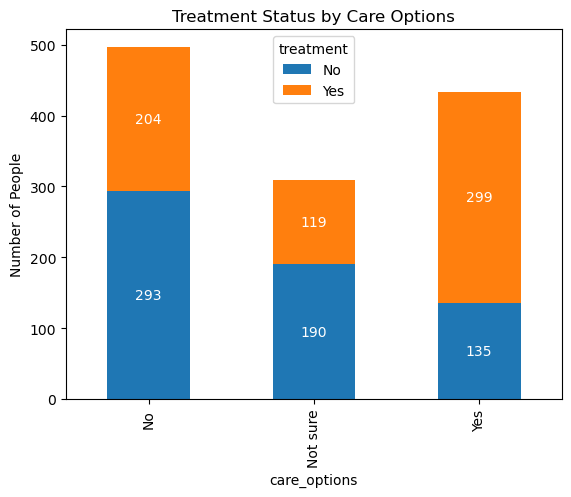

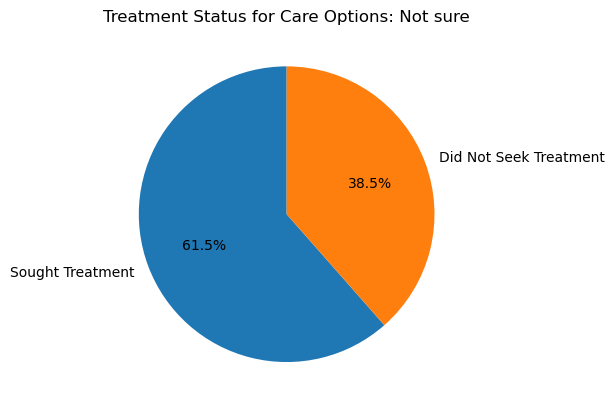

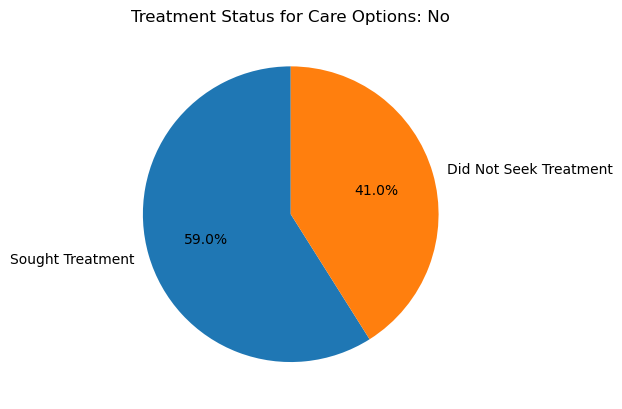

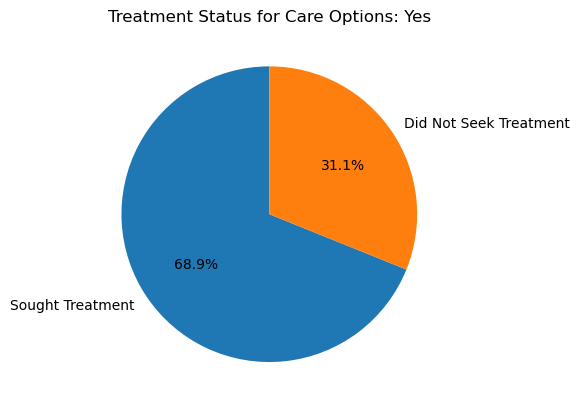

Chi-square value: 94.21196897021589
P-value: 3.484423013856505e-21


In [21]:
care_options_treatment_counts = survey_data_df.groupby(['care_options', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = care_options_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Care Options')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

care_options = survey_data_df['care_options'].unique()

for option in care_options:
    option_data = survey_data_df[survey_data_df['care_options'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Care Options: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['care_options'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

In [25]:
# Group by 'Gender', 'care_options', and 'treatment', and count the occurrences
gender_care_options_treatment_counts = survey_data_df.groupby(['gender', 'care_options', 'treatment']).size().unstack().fillna(0)

# Calculate percentages within each subgroup
gender_care_options_percentages = gender_care_options_treatment_counts.div(gender_care_options_treatment_counts.sum(axis=1), axis=0) * 100

# Reset index for a cleaner display
gender_care_options_percentages.reset_index(inplace=True)

# Display the percentages in a DataFrame
gender_care_options_percentages

treatment,gender,care_options,No,Yes
0,female,No,38.888889,61.111111
1,female,Not sure,44.776119,55.223881
2,female,Yes,17.857143,82.142857
3,male,No,62.352941,37.647059
4,male,Not sure,66.115702,33.884298
5,male,Yes,35.714286,64.285714


In [27]:
# Group by 'Gender', 'care_options', and 'treatment', and count the occurrences
gender_care_options_treatment_counts = survey_data_df.groupby(['gender', 'care_options', 'treatment']).size().unstack().fillna(0)

# Calculate percentages within each subgroup
gender_care_options_percentages = gender_care_options_treatment_counts.div(gender_care_options_treatment_counts.sum(axis=1), axis=0) * 100

# Display the percentages in a DataFrame
gender_care_options_percentages

treatment                   No        Yes
gender care_options                      
female No            38.888889  61.111111
       Not sure      44.776119  55.223881
       Yes           17.857143  82.142857
male   No            62.352941  37.647059
       Not sure      66.115702  33.884298
       Yes           35.714286  64.285714

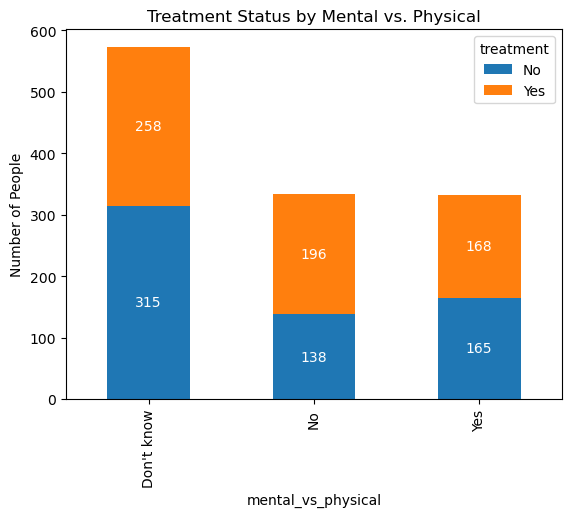

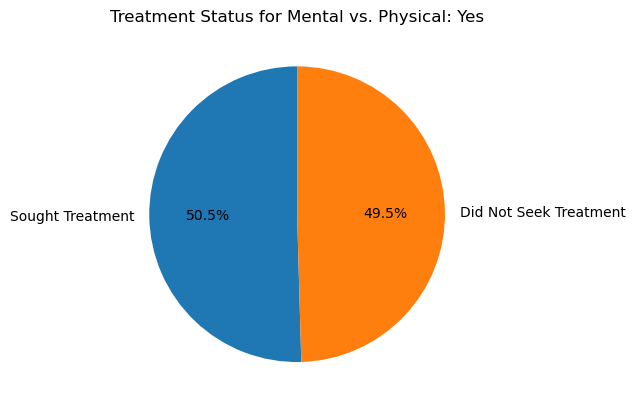

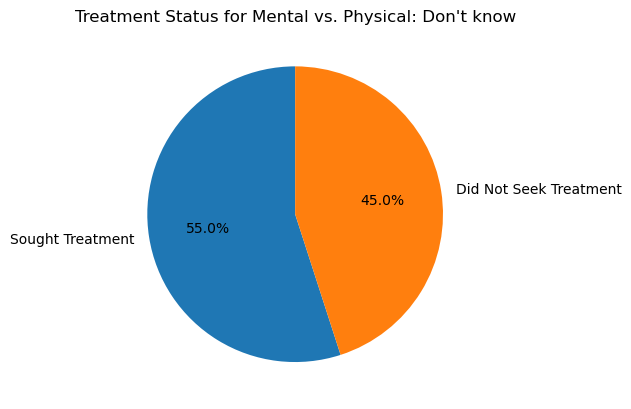

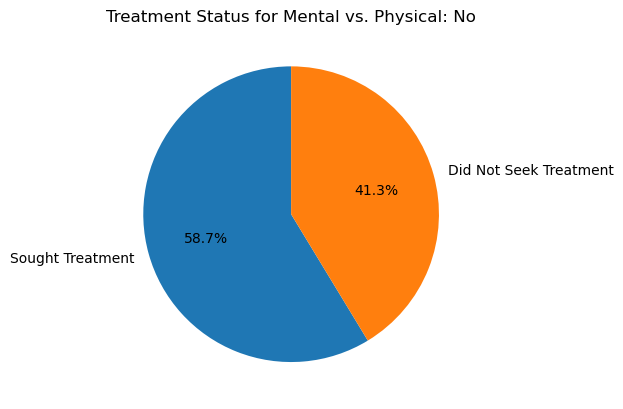

Chi-square value: 15.756301114056264
P-value: 0.0003789332245117902


In [30]:
mvp_treatment_counts = survey_data_df.groupby(['mental_vs_physical', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = mvp_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Mental vs. Physical')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

mvp_options = survey_data_df['mental_vs_physical'].unique()

for option in mvp_options:
    mvp_option_data = survey_data_df[survey_data_df['mental_vs_physical'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(mvp_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Mental vs. Physical: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['mental_vs_physical'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

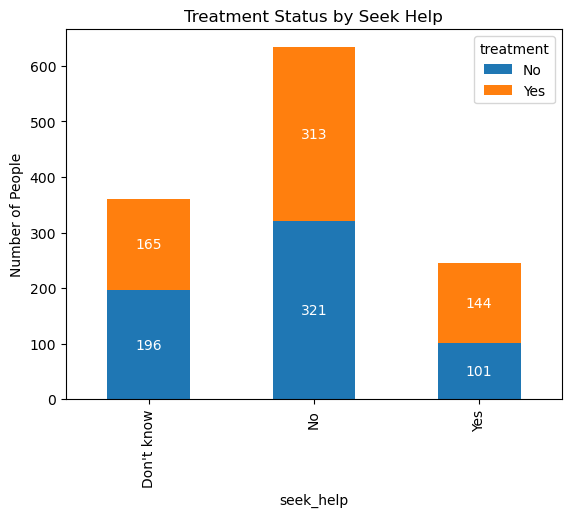

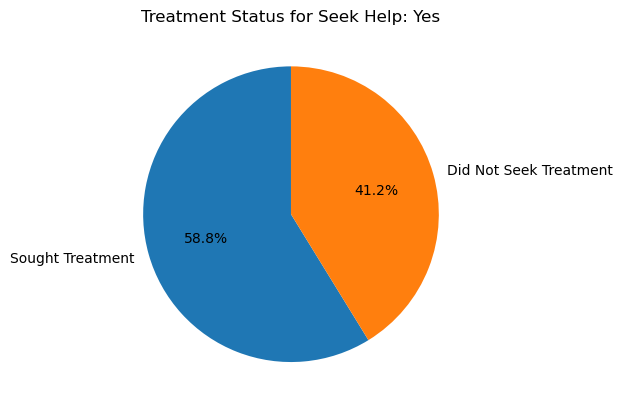

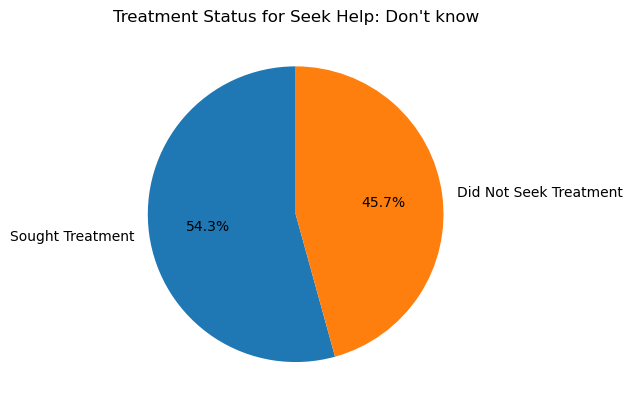

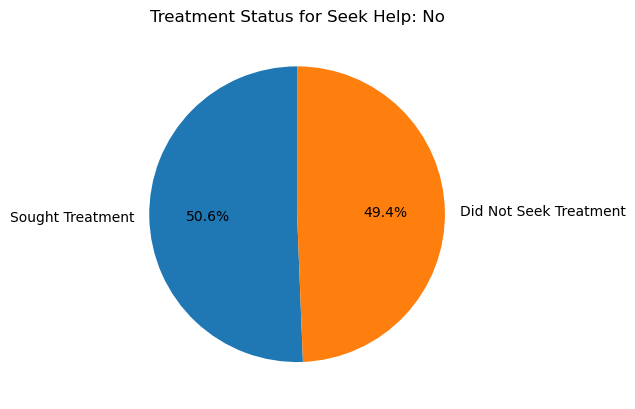

Chi-square value: 10.2971389336884
P-value: 0.005807706904442143


In [3]:
seekhelp_treatment_counts = survey_data_df.groupby(['seek_help', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = seekhelp_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Seek Help')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

seekhelp_options = survey_data_df['seek_help'].unique()

for option in seekhelp_options:
    seekhelp_option_data = survey_data_df[survey_data_df['seek_help'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(seekhelp_option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Seek Help: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['seek_help'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

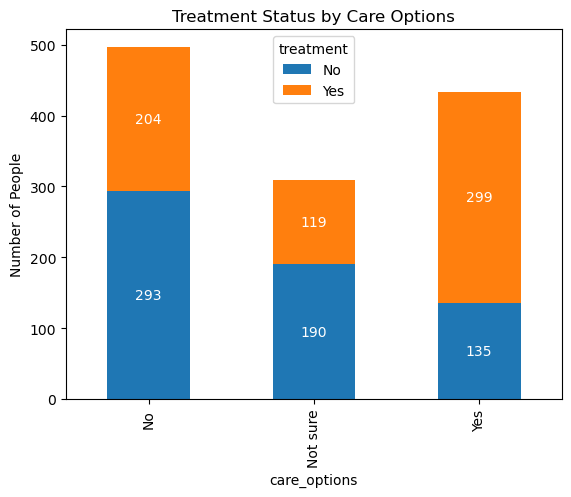

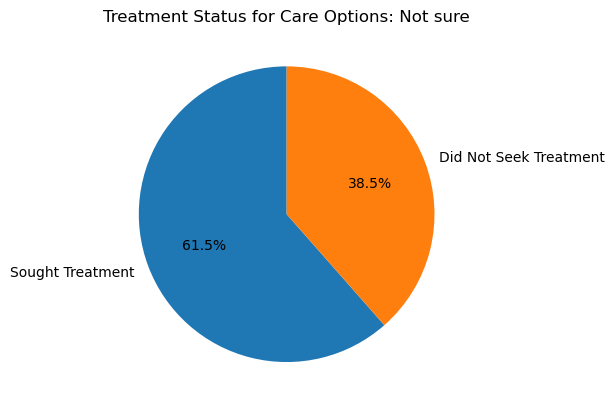

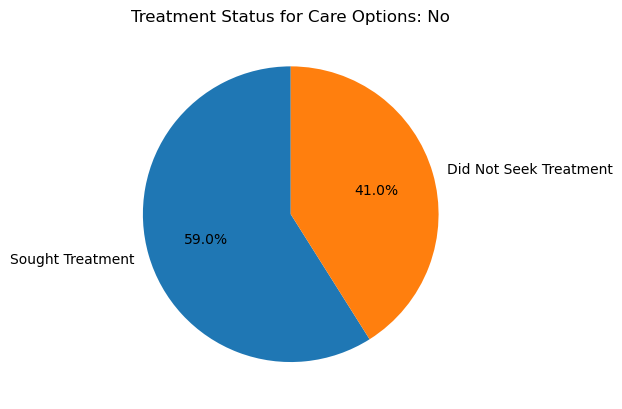

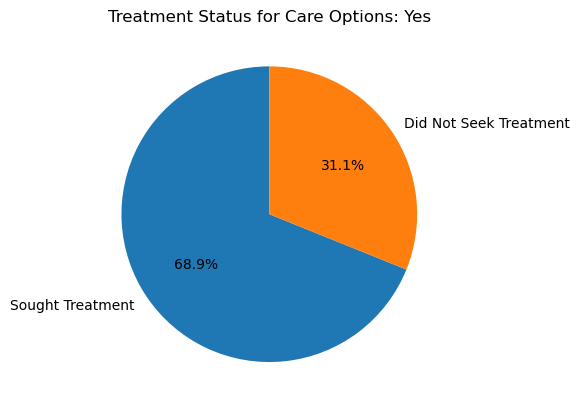

Chi-square value: 94.21196897021589
P-value: 3.484423013856505e-21
Critical value: 5.991464547107979
Reject the null hypothesis


In [5]:
# Group by 'care_options' and 'treatment', and count the occurrences
care_options_treatment_counts = survey_data_df.groupby(['care_options', 'treatment']).size().unstack().fillna(0)

# Plot bar chart
ax = care_options_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Care Options')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

# Plot pie chart for each 'care_options'
care_options = survey_data_df['care_options'].unique()

for option in care_options:
    option_data = survey_data_df[survey_data_df['care_options'] == option]['treatment'].value_counts()
    
    fig, ax = plt.subplots()
    ax.pie(option_data, labels=['Sought Treatment', 'Did Not Seek Treatment'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Treatment Status for Care Options: {option}')
    plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['care_options'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, expected = st.chi2_contingency(contingency_table)

# calculate critical value
alpha = 0.05  # choose your significance level
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
critical_value = st.chi2.ppf(1 - alpha, degrees_of_freedom)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Critical value: {critical_value}")

# compare chi2 and critical_value for decision
if chi2 > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")